In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2
from numpy.fft import ifft2, ifftshift

In [2]:
# import torch
# from torchvision.models.detection import fasterrcnn_resnet50_fpn

# # Load the pre-trained model
# model = fasterrcnn_resnet50_fpn(pretrained=True)
# model.eval()  # Set it to evaluation mode

# # Save the model
# model_path = "fasterrcnn_resnet50_fpn.pth"
# torch.save(model.state_dict(), model_path)

In [3]:
# img_shown = cv2.imread(r'static/images/displayed_fourrier.png')

In [4]:
# img_shown

In [35]:
# Specify the file path where you saved the pickle file
file_path = 'image_data_before.pickle'

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data_initial = pickle.load(file)

In [36]:
np.array(loaded_data_initial).shape

(336, 500, 3)

In [37]:
# loaded_data.reshape(130,280,3).shape

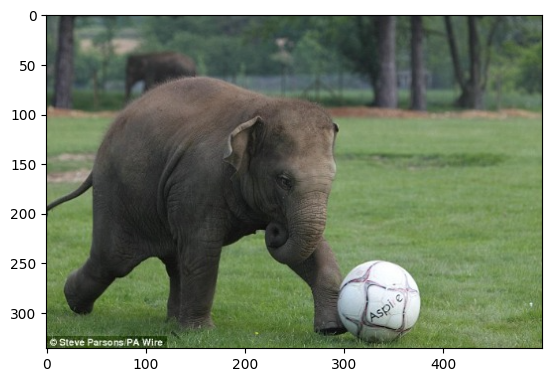

In [38]:
plt.imshow(loaded_data_initial)

In [39]:
loaded_data_initial.shape

(336, 500, 3)

In [40]:

# Specify the file path where you saved the pickle file
file_path = 'image_data_after.pickle'

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data_after = pickle.load(file)

# print('Loaded data:', loaded_data)

In [41]:
np.array(loaded_data_after).shape

(336, 500, 3)

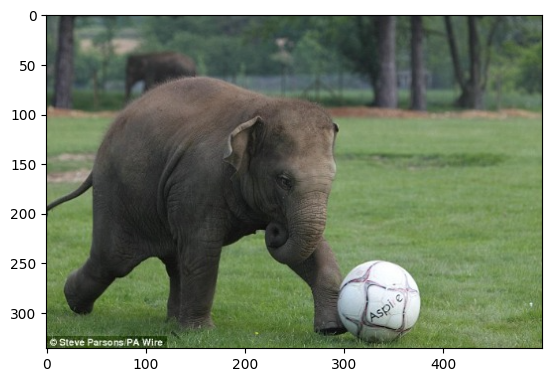

In [42]:
plt.imshow(loaded_data_after)

In [43]:
file_path = 'image_data_after_histr.pickle'

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data_after_histr = pickle.load(file)

In [44]:
loaded_data_after_histr

''

TypeError: Image data of dtype <U1 cannot be converted to float

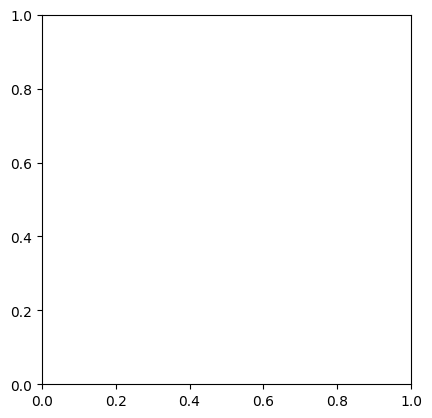

In [45]:
plt.imshow(loaded_data_after_histr)

In [ ]:
img = cv2.imread(r"static\images\elephant.jpg")

In [ ]:
plt.imshow(img)

In [ ]:
def convert_to_grayscale(img):
    image_8u = cv2.convertScaleAbs(img)
    gray_image = cv2.cvtColor(image_8u, cv2.COLOR_RGB2GRAY)
    return gray_image

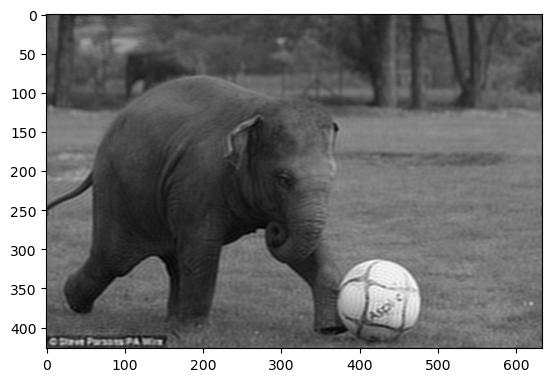

In [ ]:
def calculate_2dft(input):
    ft = np.fft.fft2(input)
    ft = np.fft.fftshift(ft)  # Shift the zero frequency components to the center
    return ft

def high_pass_filter_fft(ft, cutoff_frequency):
    rows, cols = ft.shape
    crow, ccol = rows // 2, cols // 2  # Center
    mask = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) >= cutoff_frequency:
                mask[i, j] = 1
                
    # Apply the high-pass filter directly to the Fourier transformed data
    fft_filtered = ft * mask
    return fft_filtered

def low_pass_filter_fft(ft, cutoff_frequency):
    rows, cols = ft.shape
    crow, ccol = rows // 2, cols // 2  # Center
    mask = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= cutoff_frequency:
                mask[i, j] = 1
                
    # Apply the low-pass filter directly to the Fourier transformed data
    fft_filtered = ft * mask
    return fft_filtered

def inverse_Fourier(ft):
    ift = np.fft.ifftshift(ft)  # Undo the shift to prepare for the inverse FFT
    ift = np.fft.ifft2(ift)  # Apply the inverse FFT
    ift = ift.real  # Take the real part of the result
    return ift

# Your image processing pipeline should look like this:
img = cv2.imread(r'static\images\elephant.jpg')
gray_img = convert_to_grayscale(img)
ft = calculate_2dft(gray_img)
# Apply the high-pass filter to the Fourier transform, not the log spectrum
# filtered_ft = high_pass_filter_fft(ft, 10)
filtered_ft = low_pass_filter_fft(ft, 100)
# Then take the inverse Fourier transform of the filtered data
filtered_img = inverse_Fourier(filtered_ft)
plt.imshow(filtered_img, cmap='gray')  # Ensure grayscale display


In [49]:
bgr_img = cv2.imread('static\images\elephant.jpg')

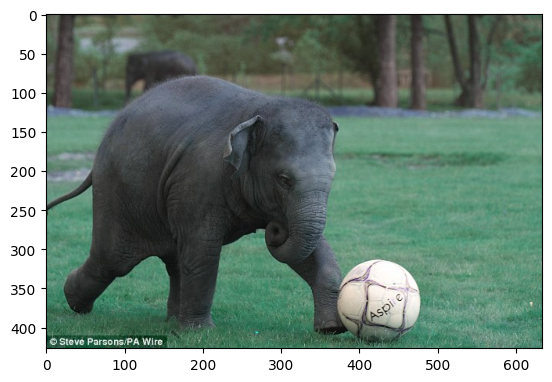

In [50]:
plt.imshow(bgr_img )

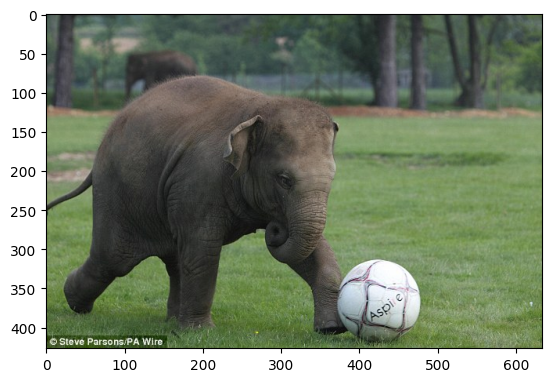

In [51]:
rgb_swapped_image = cv2.cvtColor(bgr_img , cv2.COLOR_RGB2BGR)
plt.imshow(rgb_swapped_image)

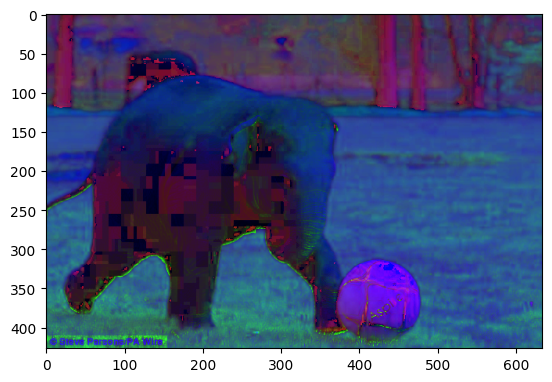

In [52]:
hsv_colour_swapped_image = cv2.cvtColor(rgb_swapped_image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_colour_swapped_image)

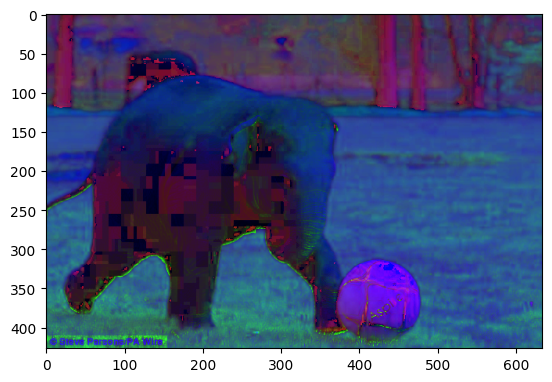

In [53]:
hsv_colour_swapped_image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_colour_swapped_image)

C:\Users\user\AppData\Local\Temp\ipykernel_10784\393390595.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(filtered_ft)))


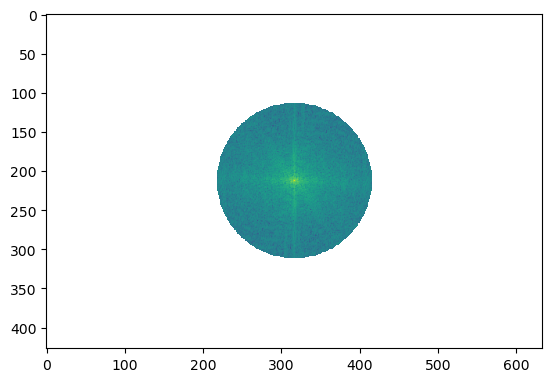

In [ ]:
    if image_colour_choice == 'bgrColour':
        if image_current_colour_scheme == 'bgrColour':
            
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
            print('1')
        elif image_current_colour_scheme == 'hsvColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_HSV2BGR)
            print('2')
        elif image_current_colour_scheme == 'rgbColour':
            
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
            print('3')
    
    if image_colour_choice == 'hsvColour':
        if image_current_colour_scheme == 'hsvColour':
            colour_swapped_image = image_array
            print('4')
        elif image_current_colour_scheme == 'bgrColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2HSV)
            print('5')
        elif image_current_colour_scheme == 'rgbColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2HSV)
            print('6')
    
    if image_colour_choice == 'rgbColour':
        if image_current_colour_scheme == 'rgbColour':
            colour_swapped_image = image_array
            print('7')
        elif image_current_colour_scheme == 'bgrColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
            print('8')
        elif image_current_colour_scheme == 'hsvColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_HSV2RGB)